# VCF Annotations

Annotations in VCF files provide information for variant calling and filtering.  Therefore (joint) distribution of annotations across candidate variants (VCF records) is of interest.  Since each variant caller produces its own set of annotations, those annotations must be examined separately for each caller.

In [1]:
library(lme4)
library(lattice)
library(latticeExtra)
lattice.options(default.args = list(as.table = TRUE))

Loading required package: Matrix
Loading required package: RColorBrewer


Making a list of data frames based on a list of callers.  Each data frame contains a random subsample of VCF records and a subset of VCF fields.

In [5]:
callers <- c("strelka2Somatic", "strelka2Germline", "lofreqSomatic", "somaticSniper", "Tnseq")
names(callers) <- callers
# helper function
import.subsample <- function(caller, ssize = 1e4, indir = "../../results/2018-07-03-vcf-annotations/benchmark-mix1a-mix3a/snvs/") {
    df <- read.delim(paste0(indir, caller, ".vcf.gz.info.tsv"), na.strings = c("NA", "."))
    mycols <- sapply(df, function(y) ! all(is.na(y)))
    mysample <- sample(seq.int(nr <- nrow(df)), size = min(nr, ssize), replace = FALSE)
    df[mysample, mycols]
}
info <- list() # list of lists
info$snvs <- lapply(callers, import.subsample, ssize = 1e4, indir = "../../results/2018-07-03-vcf-annotations/benchmark-mix1a-mix3a/snvs/")
info$indels <- lapply(callers, import.subsample, ssize = 1e4, indir = "../../results/2018-07-03-vcf-annotations/benchmark-mix1a-mix3a/indels/")

See [this table](../../results/2018-07-03-vcf-annotations/benchmark-mix1a-mix3a/info-fields.csv) for annotations for each caller.

Reshaping data frames into long format.

In [26]:
myreshape <- function(caller, infolist = info$snvs) {
    df <- infolist[[caller]]
    df <- df[sapply(df, is.numeric)]
    foo <- function(key) data.frame(Annotation = key, Value = df[[key]])
    l <- lapply(names(df), foo)
    do.call(rbind, l)
}
info.long <- list()
info.long$snvs <- lapply(callers, myreshape, info$snvs)
info.long$indels <- lapply(callers, myreshape, info$indels)

ERROR: Error in `[.default`(df, sapply(df, is.numeric)): invalid subscript type 'list'


## Marginal distributions

### SNVs

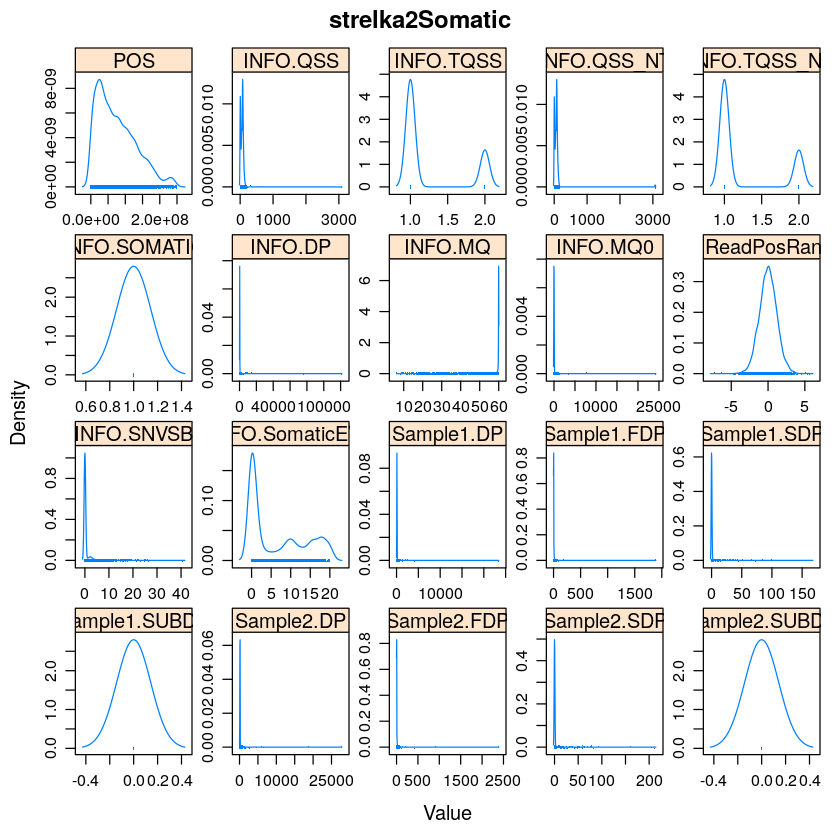

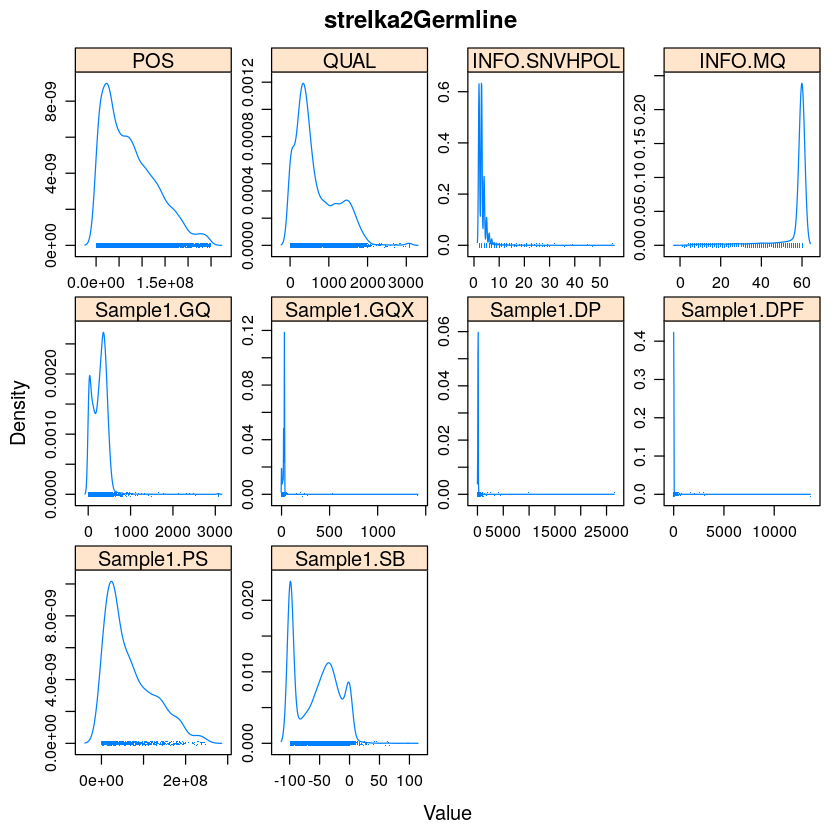

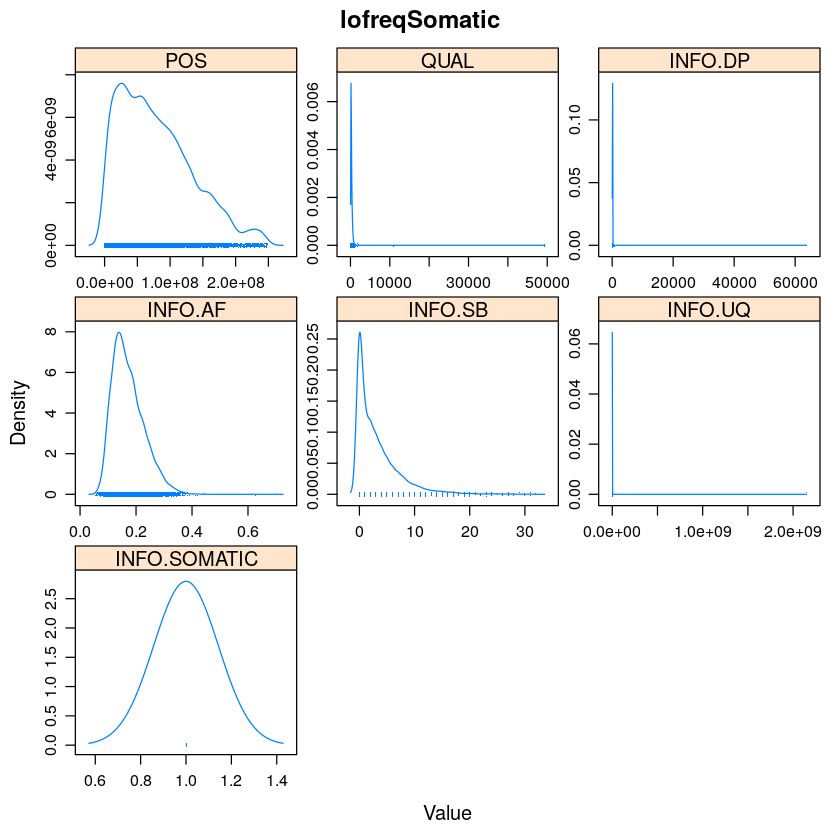

$strelka2Somatic

$strelka2Germline

$lofreqSomatic

$somaticSniper

$Tnseq


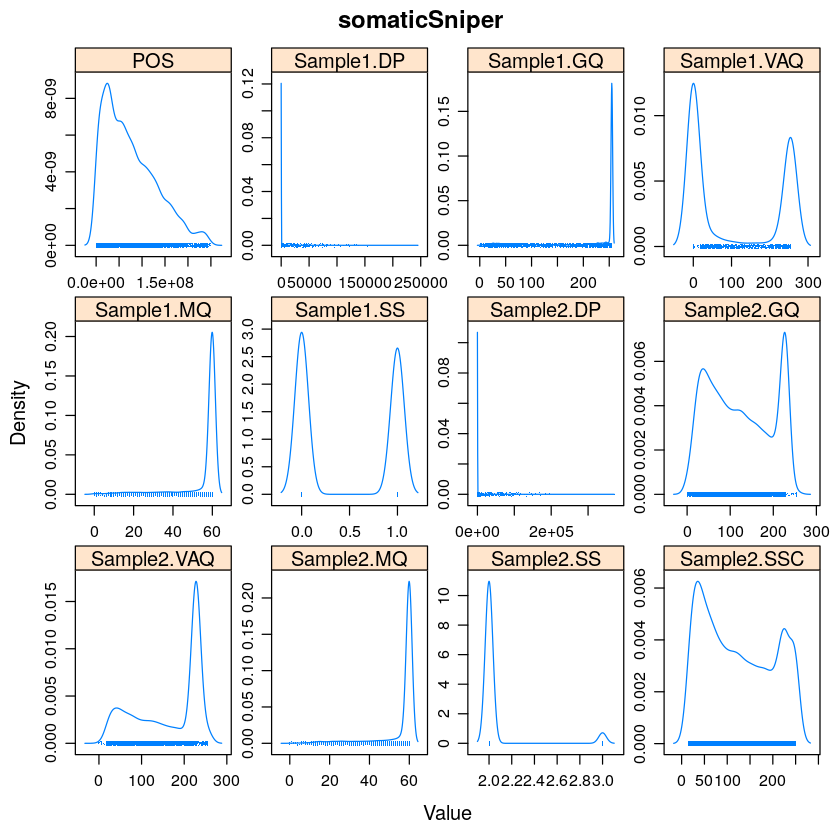

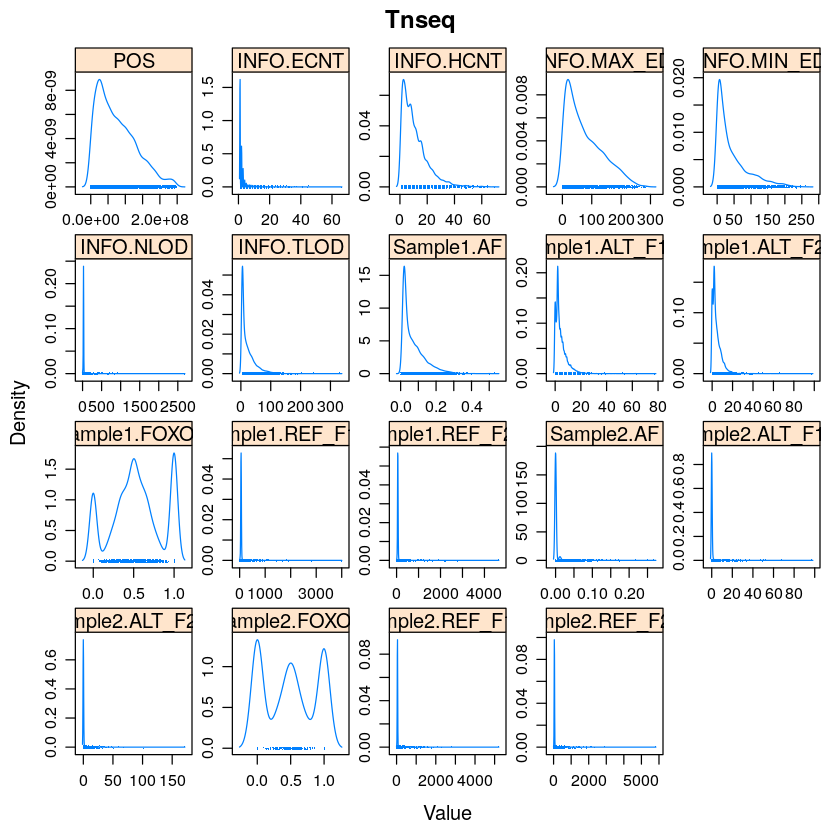

In [29]:
lapply(callers, function(y) densityplot(~ Value | Annotation, data = info.long$snvs[[y]], pch = ".", main = y, scales = list(relation = "free")))

## Pairwise joint distributions

### SNVs

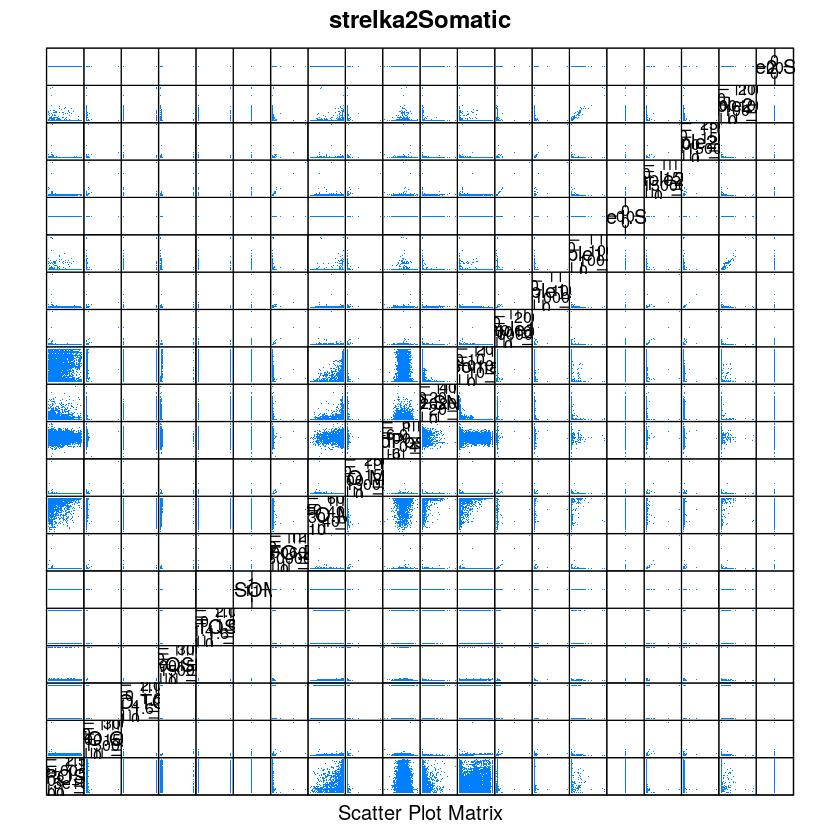

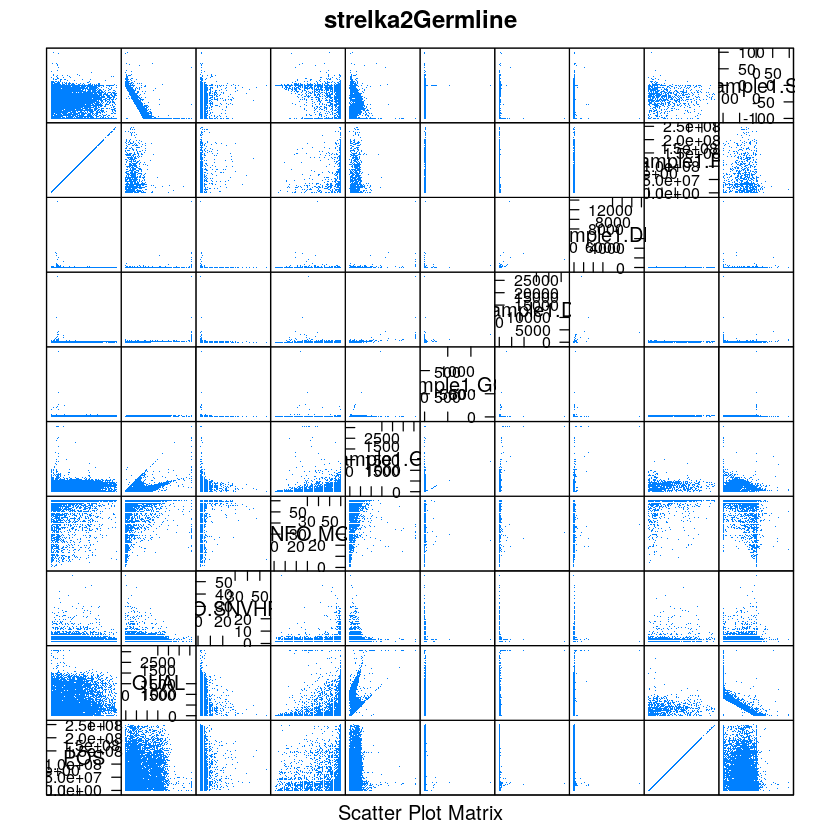

$strelka2Somatic

$strelka2Germline

$lofreqSomatic

$Tnseq


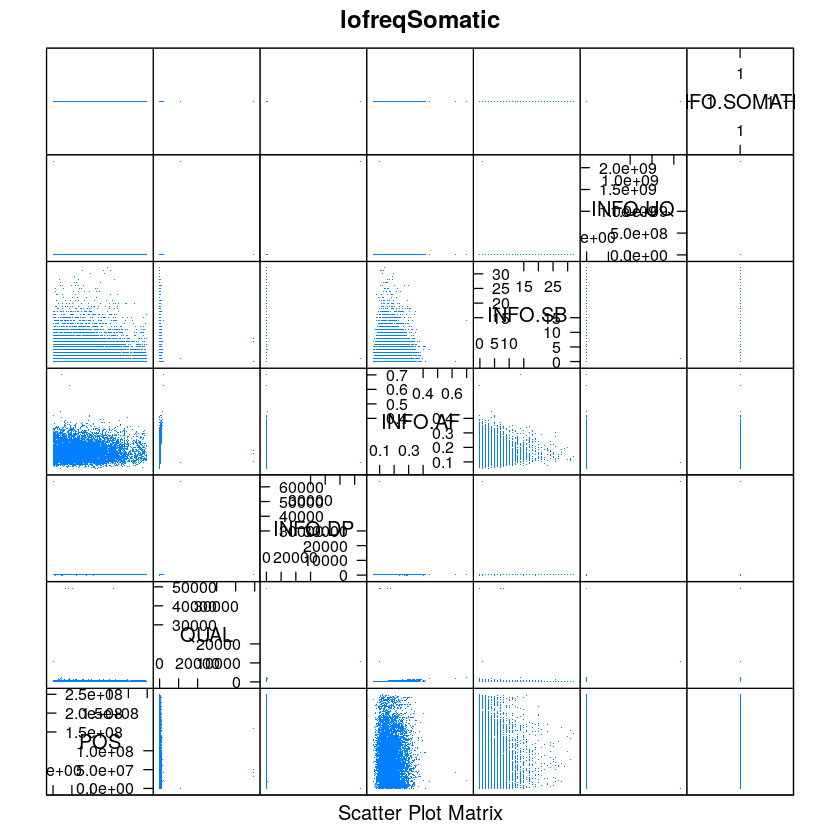

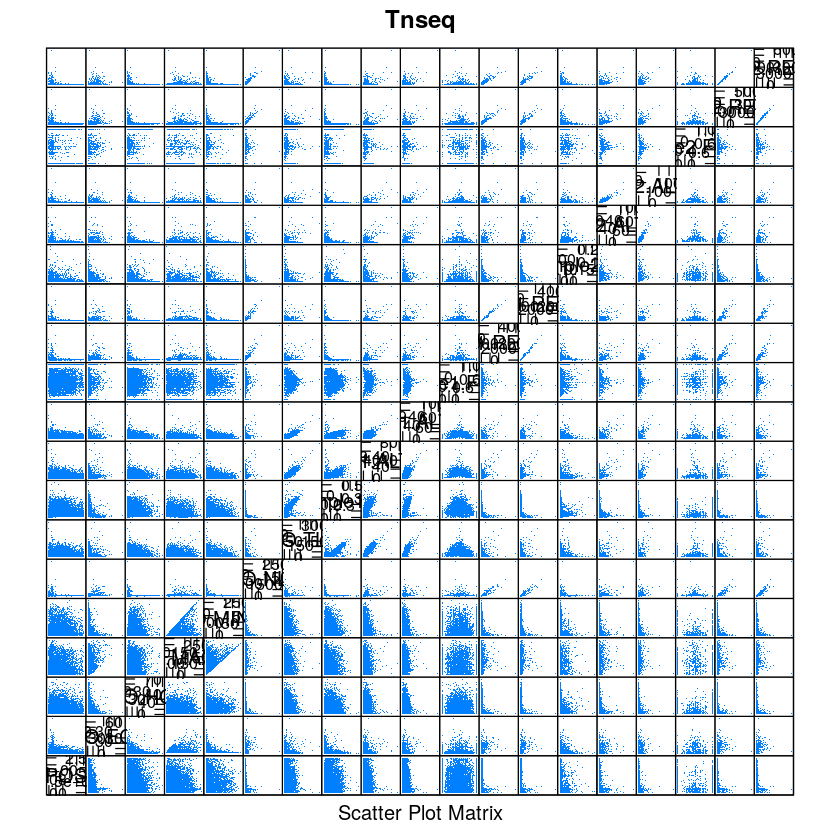

In [30]:
mysplom <- function(caller, infolist = info$snvs) {
    df <- infolist[[caller]]
    df <- df[sapply(df, is.numeric)]
    splom(df, pch = '.', main = caller)
}
lapply(callers["somaticSniper" != callers], mysplom, info$snvs)